<a href="https://colab.research.google.com/github/jjjonathan96/assignment1/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Histogram computation. 


In [ ]:
echo "# assignment1" >> README.md

SyntaxError: ignored

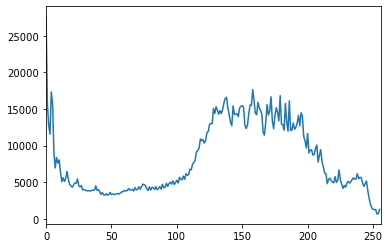

In [ ]:
#Import Library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
#Import image
img = cv.imread('im06.png', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()

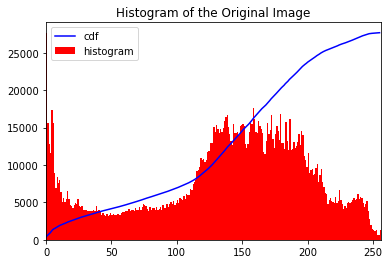

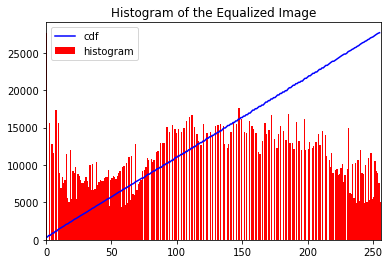

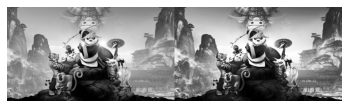

In [ ]:
#Import Library
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
#Import image
img = cv.imread('im06.png', cv.IMREAD_GRAYSCALE)
hist , bins = np.histogram(img.ravel(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()
#Plot image
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ = cv.equalizeHist(img)
hist, bins = np.histogram(equ.ravel(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img,equ))
plt.show()
res = np.hstack((img, equ))
plt.axis('off')
plt.imshow(res, cmap = 'gray')



Intensity transformation

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c = np.array([(100 , 50), (150, 200)])
t1 = np.linspace(0, c[0,1], c[0,0]+1 -0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1]+1,255,255-c[1,0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))
fig , ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('Transform.png')
plt.show()
img_orig = cv.imread('im06.png', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

plt.imshow(img_orig, cmap="gray")
plt.title('image')
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(image_transformed, cmap = "gray")
plt.title('After intensity transformation')
plt.xticks([]), plt.yticks([])
plt.show()

Gamma correction

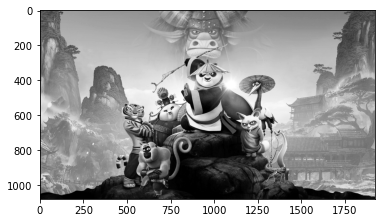

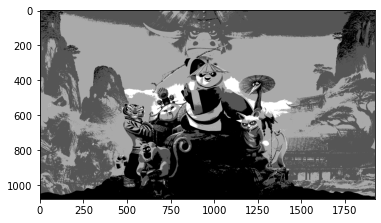

In [ ]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img_orig = cv.imread('im06.png', cv.IMREAD_GRAYSCALE)
gamma = 0.0125
table = np.array([(i/255.0)*(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig, table)

plt.show()
plt.imshow(img_orig, cmap = 'gray')

plt.show()
plt.imshow(img_gamma, cmap = 'gray')

Gaussian smoothing

In [ ]:
import numpy as np
import scipy.stats as st

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    print(kern2d)
    return kern2d/kern2d.sum()


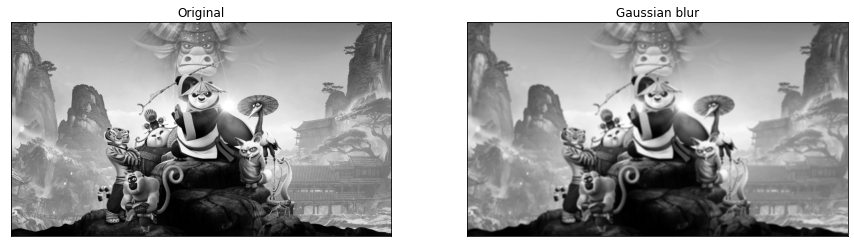

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#kernel = np.array([( 1, 6, 15, 20, 15, 6, 1), (6, 36, 90, 120, 90, 36, 6), (15, 90, 225, 300, 225, 90, 15),(6, 36, 90, 120, 90, 36, 6), (1, 6, 15, 20, 15, 6, 1)], dtype='float')/4096
#kernel = gkern(5,1)
#print(kernel)
img = cv.imread("im06.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
blur = cv.GaussianBlur(img,(5,5),3)

#imgc = cv.filter2D(img, -1, kernel)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(15, 15))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(blur, cmap="gray")
axes[1].set_title("Gaussian blur")
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

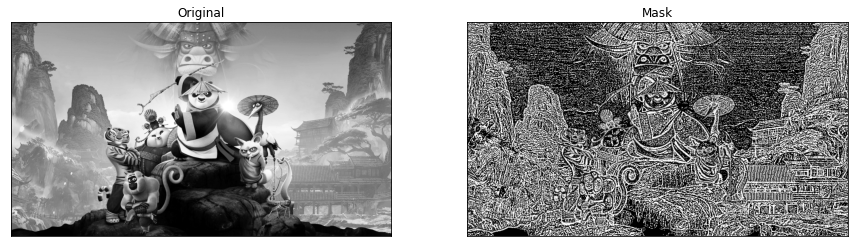

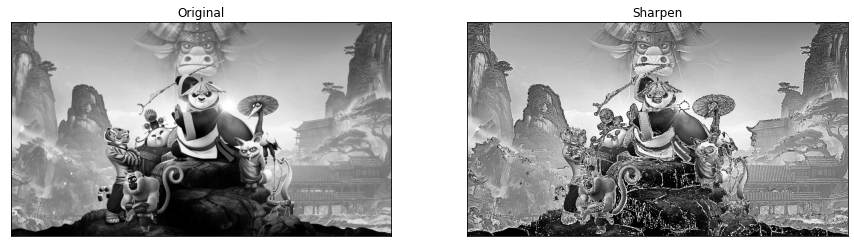

In [ ]:
img = cv.imread("im06.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
blur = cv.GaussianBlur(img,(5,5),3)
img1 = img - blur
img2 = img + 2*img1

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(15, 15))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img1, cmap="gray")
axes[1].set_title("Mask")
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(15, 15))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Sharpen")
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

Median Filter

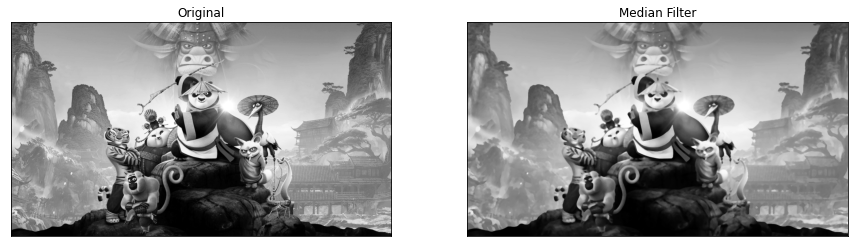

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("im06.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
median = cv.medianBlur(img,5)


fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(15, 15))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(median, cmap="gray")
axes[1].set_title("Median Filter")
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

bilateralFilter

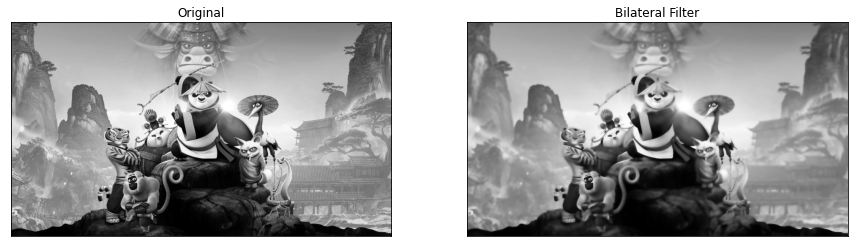

In [ ]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("im06.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
blur = cv.bilateralFilter(img,9,75,75)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(15, 15))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(blur, cmap="gray")
axes[1].set_title("Bilateral Filter")
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

In [ ]:
Rice count

Number of foreground objects 114
Number of detected contours 100


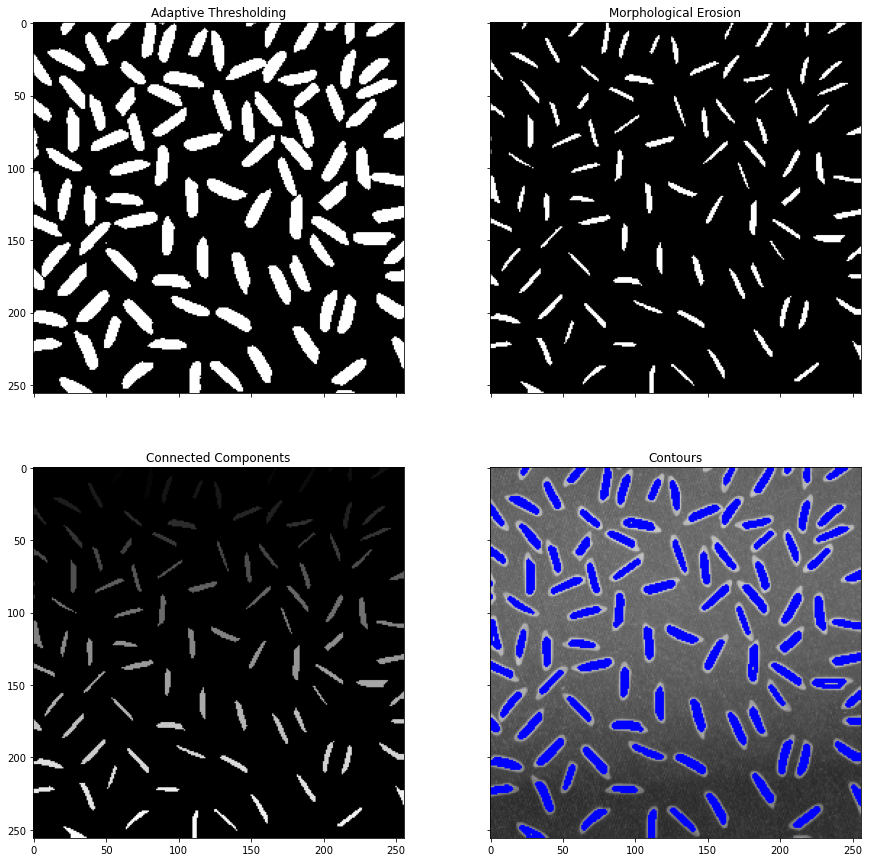

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


fig, axes = plt.subplots(2, 2, sharex='all', sharey='all', figsize=(15, 15))
# load input images for demonstration
input_rice = cv.imread("rice.png", cv.IMREAD_GRAYSCALE)

# local adaptive thresholding - computes local threshold based on given window size
output_adapthresh = cv.adaptiveThreshold (input_rice, 255.0,
		cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 51, -20.0)
#plt.show()
axes[0][0].set_title("Adaptive Thresholding")
axes[0][0].imshow(output_adapthresh, cmap = "gray")
#cv.imwrite('rice_adapthresh.png', output_adapthresh)

# morphologial erosion - cleaning up binary images
kernel = np.ones((5,5),np.uint8)
output_erosion = cv.erode(output_adapthresh, kernel)
#plt.show()
axes[0][1].set_title("Morphological Erosion")
axes[0][1].imshow(output_erosion, cmap = "gray")
#cv.imwrite('rice_erosion.png', output_erosion)

# connected components - counts and marks number of distinct foreground objects
# apply connected components on clean binary image
label_image = output_erosion.copy()
label_count = 0
rows, cols = label_image.shape
for j in range(rows):
    for i in range(cols):
        pixel = label_image[j, i]
        if 255 == pixel:
            label_count += 1
            cv.floodFill(label_image, None, (i, j), label_count)

print("Number of foreground objects", label_count)
#plt.show()
axes[1][0].set_title("Connected Components")
axes[1][0].imshow(label_image, cmap = "gray")
#cv.imwrite('rice_components.png', label_image)

# Contours - Computes polygonal contour boundary of foreground objects
# apply connected components on clean binary image
contours, _ = cv.findContours(output_erosion, cv.RETR_EXTERNAL,  cv.CHAIN_APPROX_SIMPLE)
output_contour = cv.cvtColor(input_rice, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0, 0, 255), 2)
print("Number of detected contours", len(contours))

axes[1][1].set_title("Contours")
axes[1][1].imshow(output_contour, cmap = "gray")
plt.show()
#cv.imwrite('rice_contours.png', output_contour)


In [ ]:
image zoom Neighbourhood

In [ ]:
def multiply_matrix(img, zoom_factor):
    h, w = img.shape
    zeros = np.zeros((h*zoom_factor,w*zoom_factor))
    
    ii = 0
    for i in range(0,h*zoom_factor,zoom_factor):
        jj = 0
        for j in range(0,w*zoom_factor, zoom_factor):
            temp_value = img[ii, jj]
            for k in range(i, i+zoom_factor):
                for l in range(j, j+zoom_factor):
                    zeros[k,l] = temp_value
                    
            jj += 1
        ii += 1
        
    return(zeros)

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread("im02small.png", cv.IMREAD_GRAYSCALE)
zoom_factor = 4
h ,w = img.shape
print(h,w)
zoom_image = np.zeros((zoom_factor*h, zoom_factor*w))
result = multiply_matrix(img, zoom_factor)
print(result.shape)

In [ ]:
plt.show()
plt.imshow(result, cmap="gray")
cv.imwrite("neighbourim02.png",result)

In [ ]:
qq = cv.imread("im02.png", cv.IMREAD_GRAYSCALE)
ss = 0
for i in range(h):
    for j in range(w):
        ss += (qq[i,j] - result[i,j])**2
print(ss)

Bilinear interpolation

In [ ]:
from __future__ import print_function
import sys
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def bilinear_interpolation_row(start,end,factor,last=0):
    intervals = 2*factor - 1
    list1 = []
    list1.append(start)
    for i in range(1,intervals):
        list1.append(round(end*(i/intervals) + start*((intervals - i)/intervals)))
    #if last == 1:
    list1.append(end)
    print("row vector",list1)
    return(list1)

def bilinear_interpolation_column(start,end,factor):
    intervals = 2*factor - 1
    list1 = []
    list1.append(start)
    for i in range(1,intervals):
        list1.append(round(end*(i/intervals) + start*((intervals - i)/intervals)))
    list1.append(end)
    return(list1)

def image_zoom(image, zoom_factor):
    
    h,w = image.shape
    process_matrix = []
    for i in range(h):
        row_matrix = []
        resultant_matrix = []
        for j in range(w):
            left_top = image[i,j]
            if j+1 <= w-1:
                right_top = image[i, j+1]
            else:
                right_top = 0
            if i + 1 <= h-1:
                left_bottom = image[i+1, j]
            else:
                left_bottom = 0
            if i + 1 <= h-1 and j + 1 <= w - 1:
                right_bottom= image[i+1, j+1]
            else:
                right_bottom=0

            left_column = bilinear_interpolation_column(left_top, left_bottom, zoom_factor)
            right_column = bilinear_interpolation_column(right_top, right_bottom, zoom_factor)

            if i == h-2:
                small_matrix = []           
                for k in range(len(left_column)):
                    if j == w-2:
                        small_matrix.append(bilinear_interpolation_row(left_column[k], right_column[k], zoom_factor,last=1))
                    else:
                        small_matrix.append(bilinear_interpolation_row(left_column[k], right_column[k], zoom_factor))

            else:
                small_matrix = []           
                for k in range(len(left_column)-1):
                    if j == w-2:
                        small_matrix.append(bilinear_interpolation_row(left_column[k], right_column[k], zoom_factor,last=1))
                    else:
                        small_matrix.append(bilinear_interpolation_row(left_column[k], right_column[k], zoom_factor))

        
        row_matrix.append(small_matrix)
    process_matrix.append(row_matrix)
    print(round((i/h)*100),end='\r')
    sys.stdout.flush()
  return(process_matrix)

def final(result):
    result_matrix = []
    for i in range(len(result)):
        column_matrix = []
        for j in range(3):
            row_matrix = []
            for k in range(len(result[0])):
                row_matrix += result[i][k][j]
                column_matrix.append(row_matrix)
        result_matrix += column_matrix
        print(round((i/len(result))*100), end='\r')
        sys.stdout.flush()


   
    plt.show()
    plt.imshow(result_matrix, cmap="gray")
    #cv.imwrite("result.png",result_matrix)
    return(result_matrix)




IndentationError: unindent does not match any outer indentation level (<tokenize>, line 67)

In [ ]:
import cv2 as cv
image = cv.imread("im02small.png", cv.IMREAD_GRAYSCALE)
import numpy as np

compute_matrix = image_zoom(image, 4)
final_image = final(compute_matrix)

print(image.shape)

print(len(compute_matrix))
print(len(compute_matrix[0]))

print(len(final_image))
print(len(final_image[0]))

zeros method

In [ ]:
def bilinear_interpolation_row(start,end,factor,last=0):
    intervals = 2*factor - 1
    list1 = []
    #list1.append(start)
    for i in range(1,intervals):
        list1.append(round(end*(i/intervals) + start*((intervals - i)/intervals)))
    #if last == 1:
    #list1.append(end)
    
    return(list1)

def bilinear_interpolation_column(start,end,factor):
    intervals = 2*factor - 1
    list1 = []
    #list1.append(start)
    for i in range(1,intervals):
        list1.append(round(end*(i/intervals) + start*((intervals - i)/intervals)))
    #list1.append(end)
    return(list1)

def image_zeros(image, zoom_factor):
    h,w = image.shape
    zero_matrix = np.zeros((h*zoom_factor,w*zoom_factor))
    for i in range(h-1):
        for j in range(w-1):
            zero_matrix[i*zoom_factor, j*zoom_factor] = image[i,j]
            row = bilinear_interpolation_row(image[i,j], image[i,j+1],zoom_factor)
            for k in range(1,zoom_factor-1):
                zero_matrix[i*zoom_factor, j*zoom_factor+k] = row[k]
                
            column = bilinear_interpolation_column(image[i,j], image[i+1,j],zoom_factor)
            for m in range(1,zoom_factor-1):
                zero_matrix[i*zoom_factor+m, j*zoom_factor] = column[m]
    return(zero_matrix)
       

(1200, 1920)


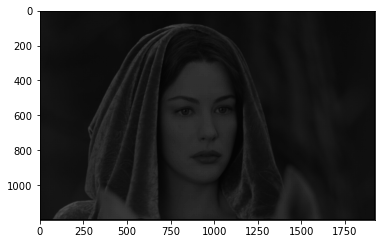

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
image= cv.imread("im02small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")
cv.imwrite("jim02.png",v)
print(v.shape)

In [ ]:
from __future__ import print_function
import sys
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def bilinear_interpolation_row(start,end,factor,last=0):
    intervals = 2*factor - 1
    list1 = []
    list1.append(start)
    for i in range(1,intervals):
        list1.append(round(end*(i/intervals) + start*((intervals - i)/intervals)))
    #if last == 1:
    list1.append(end)
    return(list1)

def bilinear_interpolation_column(start,end,factor):
    intervals = 2*factor - 1
    list1 = []
    list1.append(start)
    for i in range(1,intervals):
        list1.append(round(end*(i/intervals) + start*((intervals - i)/intervals)))
    list1.append(end)
    return(list1)

def image_zeros(image, zoom_factor):
    h,w = image.shape
    zero_matrix = np.zeros((h*zoom_factor,w*zoom_factor))
    for i in range(h):
        for j in range(w):
            #zero_matrix[i*zoom_factor, j*zoom_factor] = image[i,j]
            if j + 1 <= w -1:
                row = bilinear_interpolation_row(image[i,j], image[i,j+1],zoom_factor)
            else:
                row = bilinear_interpolation_row(image[i,j], image[i,j],zoom_factor)
            if i + 1 <= h-1:
                column = bilinear_interpolation_column(image[i,j], image[i+1,j],zoom_factor)
            else:
                column = bilinear_interpolation_column(image[i,j], image[i,j],zoom_factor)
                
            for k in range(zoom_factor):
                zero_matrix[i*zoom_factor, j*zoom_factor+k] = row[k]
                zero_matrix[i*zoom_factor+k, j*zoom_factor] = column[k]
                
        print(round(i/(h-1)*100), end='\r')
        sys.stdout.flush()
    return(zero_matrix)
      
    

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
image= cv.imread("im02small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")
cv.imwrite("jim02.png",v)
print(v.shape)

NameError: name 'sys' is not defined

In [ ]:
ss= 0
print(v.shape)
u = cv.imread("im02.png",cv.IMREAD_GRAYSCALE)
print(u.shape)
for i in range(v.shape[0]):
    for j in range(v.shape[1]):
        ss += (v[i,j]-u[i,j])
print(ss)
    

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
image= cv.imread("im02small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")

print(v.shape)

image= cv.imread("im03small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")
print(v.shape)

image= cv.imread("im04small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")
print(v.shape)

image= cv.imread("im05small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")
print(v.shape)

image= cv.imread("im06small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")
print(v.shape)

image= cv.imread("im07small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")
print(v.shape)

image= cv.imread("im08small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")
print(v.shape)

image= cv.imread("im09small.png",cv.IMREAD_GRAYSCALE)
v = image_zeros(image,4)
plt.show()
plt.imshow(v, cmap="gray")
print(v.shape)